In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Advertising.csv')
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
df.drop('Unnamed: 0', axis = 1, inplace = True)

In [4]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [5]:
X = df.drop('Sales', axis = 1)

In [6]:
y = df['Sales']

In [7]:
from sklearn.preprocessing import PolynomialFeatures

In [8]:
polynomial_converter = PolynomialFeatures(degree = 2, include_bias = False)

In [9]:
polynomial_converter.fit(X)

PolynomialFeatures(include_bias=False)

In [10]:
poly_features = polynomial_converter.transform(X) # This will convert actual features 3 to poly features 9.

In [11]:
poly_features.shape

(200, 9)

In [12]:
X.shape # actual features 

(200, 3)

In [13]:
X.iloc[0]

TV           230.1
Radio         37.8
Newspaper     69.2
Name: 0, dtype: float64

In [14]:
poly_features[0] # i,e TV**2, Radio**2, Newspaper**2, TV*Radio, TV*Newspaper, Radio*Newspaper (extra 6 coloumns added by polynomial features)

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [15]:
polynomial_converter.fit_transform(X)

array([[ 230.1 ,   37.8 ,   69.2 , ..., 1428.84, 2615.76, 4788.64],
       [  44.5 ,   39.3 ,   45.1 , ..., 1544.49, 1772.43, 2034.01],
       [  17.2 ,   45.9 ,   69.3 , ..., 2106.81, 3180.87, 4802.49],
       ...,
       [ 177.  ,    9.3 ,    6.4 , ...,   86.49,   59.52,   40.96],
       [ 283.6 ,   42.  ,   66.2 , ..., 1764.  , 2780.4 , 4382.44],
       [ 232.1 ,    8.6 ,    8.7 , ...,   73.96,   74.82,   75.69]])

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.20, random_state=42)

In [18]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [19]:
model.fit(X_train, y_train)

LinearRegression()

In [20]:
predictions = model.predict(X_test)

In [21]:
model.coef_

array([ 5.32356160e-02,  1.70980451e-02,  1.05807447e-02, -1.12286779e-04,
        1.11121741e-03, -7.37989541e-05,  1.32842962e-04,  1.24892479e-04,
        2.79665560e-05])

In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [23]:
MAE = mean_absolute_error(y_test, predictions)

In [24]:
MSE = mean_squared_error(y_test, predictions)

In [25]:
RMSE = np.sqrt(MSE)

In [26]:
MAE

0.5261794444043753

In [27]:
MSE

0.4129102285379044

In [28]:
RMSE

0.6425809120553647

In [29]:
poly_features[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [30]:
X.iloc[0]

TV           230.1
Radio         37.8
Newspaper     69.2
Name: 0, dtype: float64

In [31]:
# create the differnet order polynomial
# split poly feat train/test
# fit on train
# store/ save the rmse for both train and test
# plot the results (error vs poly order)

In [32]:
train_rmse_error = []
test_rmse_error = []

for d in range(1, 10):
    
    poly_converter = PolynomialFeatures(degree = d, include_bias = False)
    poly_features = poly_converter.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.20, random_state=42)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))
    
    train_rmse_error.append(train_rmse)
    test_rmse_error.append(test_rmse)

In [33]:
train_rmse_error

[1.644727765644337,
 0.6003304710491731,
 0.46482379884798103,
 0.368412683111556,
 0.2504949069618836,
 0.20742229849834254,
 6.088133864161374,
 0.34918582526565006,
 0.8063391571420309]

In [34]:
test_rmse_error

[1.7815996615334502,
 0.6425809120553647,
 0.5427415675086388,
 0.7860986740163405,
 8.746506398759436,
 28.385333943361438,
 2524.114689955122,
 2373.9561705193123,
 105671.1330924583]

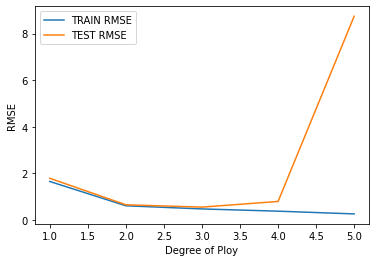

In [35]:
plt.plot(range(1,6), train_rmse_error[:5], label = 'TRAIN RMSE')
plt.plot(range(1,6), test_rmse_error[:5], label = 'TEST RMSE')

plt.xlabel('Degree of Ploy')
plt.ylabel('RMSE')
plt.legend()

The above curve shows an train set error and test set error and its clearly says that the best polynomial degree is 3 comparing to both the results later the training set is same for all higher order polynomials but for test set higher order polynomials error statrted gradually increasing. 

In [36]:
final_poly_converter = PolynomialFeatures(degree = 3, include_bias = False)

In [37]:
final_model = LinearRegression()

In [38]:
fully_converted_X = poly_converter.fit_transform(X)
final_model.fit(fully_converted_X, y)

LinearRegression()

In [39]:
from joblib import dump, load

In [40]:
dump(final_model, 'final_poly_model.joblib')

['final_poly_model.joblib']

In [41]:
dump(final_poly_converter, 'final_poly_model.joblib')

['final_poly_model.joblib']

In [42]:
loaded_converter = load('final_poly_model.joblib')

In [43]:
loaded_model = load('final_poly_model.joblib')

In [44]:
campaign = [[149, 22, 12]]

In [45]:
transformed_data = loaded_converter.fit_transform(campaign)

In [48]:
# loaded_model(transformed_data)